In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import SimpleITK as sitk
import os
import sys

# import mlflow

In [3]:
filepath_train_images = "data/train_set/images/"
filepath_train_labels = "data/train_set/labels/"
filepath_test_images = "data/test_set/images/"

train_images = os.listdir(filepath_train_images)
train_segmentation_labels = os.listdir(filepath_train_labels)
train_classification_labels = pd.read_csv('luna23-ismi-train-set.csv')
test_images = os.listdir(filepath_test_images)


In [4]:
def create_arrays(filepath):
    arrays = []
    for each in os.listdir(filepath): #below section is part of 'for loop' so check indetation
        imgObj=sitk.ReadImage(os.path.join(filepath,each))
        ndarray=sitk.GetArrayFromImage(imgObj)
        arrays.append(ndarray)
    
    return arrays

In [5]:
train_classification_labels.columns

Index(['patientid', 'seriesuid', 'noduleid', 'coordx', 'coordy', 'coordz',
       'diameter_mm', 'noduletype', 'malignancy'],
      dtype='object')

In [7]:
train_classification_labels['malignancy'].value_counts().to_frame().style.background_gradient()

,malignancy
0,475
1,212


In [10]:
train_classification_labels['noduletype'].value_counts().to_frame().style.background_gradient()

,noduletype
Solid,466
Calcified,152
GroundGlassOpacity,51
SemiSolid,18


In [42]:
train_classification_labels.columns
labels_images['patientid'].value_counts().to_frame().style.background_gradient()

,patientid
LIDC-IDRI-0491,9
LIDC-IDRI-0641,6
LIDC-IDRI-0188,6
LIDC-IDRI-0124,6
LIDC-IDRI-0807,6
LIDC-IDRI-0582,6
LIDC-IDRI-0118,6
LIDC-IDRI-0879,5
LIDC-IDRI-0775,5
LIDC-IDRI-0181,5


In [5]:
# convenience function that returns the axial, coronal and sagittal view given a cube (in numpy format) containing a nodule
def get_orthogonal_patches(x):
    dims = x.shape # Get shape of X
    axial = x[dims[0]//2,:,:]. squeeze()
    coronal = x[:,:,dims[2]//2].squeeze()
    sagittal= x[:,dims[1]//2,:].squeeze()
    return axial, coronal, sagittal

In [6]:
image = sitk.ReadImage("train_set/images/2.25.10002343616245235850618787121539297713552472755036270141148.mha")
print(image)
nda = sitk.GetArrayFromImage(image)

Image (00000195A3CDF930)
  RTTI typeinfo:   class itk::Image<short,3>
  Reference Count: 1
  Modified Time: 905
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 878
  UpdateMTime: 904
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [128, 128, 64]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [128, 128, 64]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [128, 128, 64]
  Spacing: [0.820312, 0.820312, 1.25]
  Origin: [37.6373, -123.867, -304.25]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.820312 0 0
0 0.820312 0
0 0 1.25

  PointToIndexMatrix: 
1.21905 0 0
0 1.21905 0
0 0 0.8

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (00000195A390AD60)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int

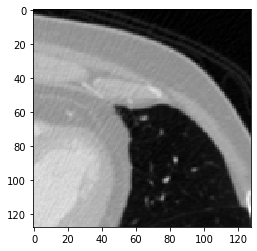

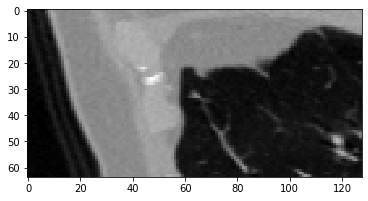

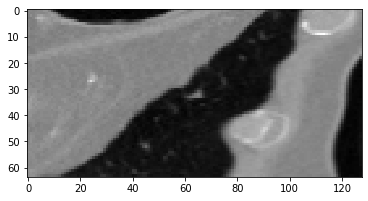

In [7]:
image = sitk.GetArrayFromImage(image)
axial, coronal, sagittal = get_orthogonal_patches(image)
plt.imshow(axial, cmap='gray')
plt.show()
plt.imshow(coronal, cmap='gray')
plt.show()
plt.imshow(sagittal, cmap='gray')
plt.show()